In [100]:
#First import the tools that are needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer


In [101]:
training = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/train.csv')
training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [102]:
testing = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/test.csv')
testing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [103]:
sample_sub = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/sample_sub_reg_origin.csv')
sample_sub.head(2)

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217


In [104]:
training.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

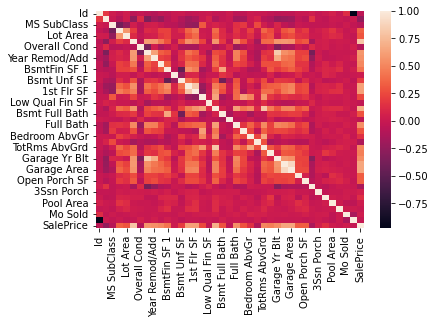

In [105]:
sns.heatmap(training.corr());

In [106]:
#Lot Area, BsmtFin SF 1 , 1st Flr SF, 2nd Flr SF, Full Bath, 
# Garage Area, Bedroom AbvGr, Kitchen AbvGr, Wood Deck SF, 
#Open Porch SF, Pool Area
# 
# SN: Catergorical -columns 40-43, 16, 17, 28-29, 

In [107]:
X_train_1 = training[['Lot Area', 'BsmtFin SF 1' , '1st Flr SF', 
'2nd Flr SF', 'Full Bath', 'Garage Area', 
'Bedroom AbvGr', 'Kitchen AbvGr', 'Wood Deck SF', 
'Open Porch SF', 'Pool Area'
]]

y_train = training['SalePrice'] 

In [108]:
si = SimpleImputer(strategy='mean')

In [109]:
X_train_filled = si.fit_transform(X_train_1)
X_train_filled

array([[13517.,   533.,   725., ...,     0.,    44.,     0.],
       [11492.,   637.,   913., ...,     0.,    74.,     0.],
       [ 7922.,   731.,  1057., ...,     0.,    52.,     0.],
       ...,
       [ 7558.,     0.,  1172., ...,     0.,     0.,     0.],
       [10400.,   155.,  1200., ...,     0.,   189.,     0.],
       [ 7500.,     0.,  1028., ...,   140.,    60.,     0.]])

In [110]:
ss = StandardScaler()

In [111]:
X_train_ss = ss.fit_transform(X_train_filled, y_train)

In [112]:
knn = KNeighborsClassifier()

In [113]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_ss, y_train)

In [114]:
knn.predict(X_train_ss)

array([130500, 220000, 109000, ..., 177000, 144000, 189000])

In [115]:
preds_3 = knn.predict(testing[['Lot Area', 'BsmtFin SF 1' , '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Garage Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Wood Deck SF', 
'Open Porch SF', 'Pool Area']])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [116]:
preds_3

array([277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
       277000, 277000, 277000, 277000, 277000, 277000, 277000, 277000,
      

In [117]:
knn.score(X_train_ss, y_train)

0.9960994636762555

In [118]:
cross_val_score(knn, X_train_ss, y_train, cv=10).mean()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.012190385981529717

In [119]:
testing['SalePrice'] = preds_3

In [120]:
testing

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,277000
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,277000
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,277000
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,277000
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,277000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,277000
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,277000
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,277000
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,277000


In [124]:
testing[['Id', 'SalePrice']].to_csv('Knn_Test.csv', index=False)